In [80]:
from types import CellType

# Cell 1: Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [110]:
#Cell 2: Data Upload
raw_data_path = '..\\data\\heart_statlog_cleveland_hungary_final.csv'
cleaned_data_path = '..\\data\\cleaned_heart_statlog.csv'
df = pd.read_csv(raw_data_path)

print(f'Dataset size: {df.shape}')
df.head()

Dataset size: (1190, 12)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [82]:
# Cell 3: Duplicate Rows
df.drop_duplicates(inplace=True)

In [83]:
# Cell 4: Check
df.describe()
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [84]:
# Cell 5
#Remove rows where "resting bp s" is 0
df = df.copy()
df = df[df["resting bp s"]!=0]
#Replace rows where "cholesterol" is 0 with the mean value
cholesterol_mean = df[df["cholesterol"]!=0]["cholesterol"].mean()
df["cholesterol"] = df["cholesterol"].replace(0, cholesterol_mean)

In [85]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,0.789531,3.251908,132.540894,244.635389,0.233370,0.604144,136.789531,0.404580,0.886696,1.635769,0.552890
std,9.437636,0.407864,0.931502,17.999749,53.347125,0.423206,0.806161,25.467129,0.491078,1.066960,0.609555,0.497466
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,244.635389,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [86]:
#Cell 7 : One-Hot Encoding for Nominal-Categorical Variables
df_encoded = pd.get_dummies(df, columns=["sex", "fasting blood sugar", "exercise angina"])

In [87]:
#Cell 8
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 1189
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    917 non-null    int64  
 1   chest pain type        917 non-null    int64  
 2   resting bp s           917 non-null    int64  
 3   cholesterol            917 non-null    float64
 4   resting ecg            917 non-null    int64  
 5   max heart rate         917 non-null    int64  
 6   oldpeak                917 non-null    float64
 7   ST slope               917 non-null    int64  
 8   target                 917 non-null    int64  
 9   sex_0                  917 non-null    bool   
 10  sex_1                  917 non-null    bool   
 11  fasting blood sugar_0  917 non-null    bool   
 12  fasting blood sugar_1  917 non-null    bool   
 13  exercise angina_0      917 non-null    bool   
 14  exercise angina_1      917 non-null    bool   
dtypes: bool(6)

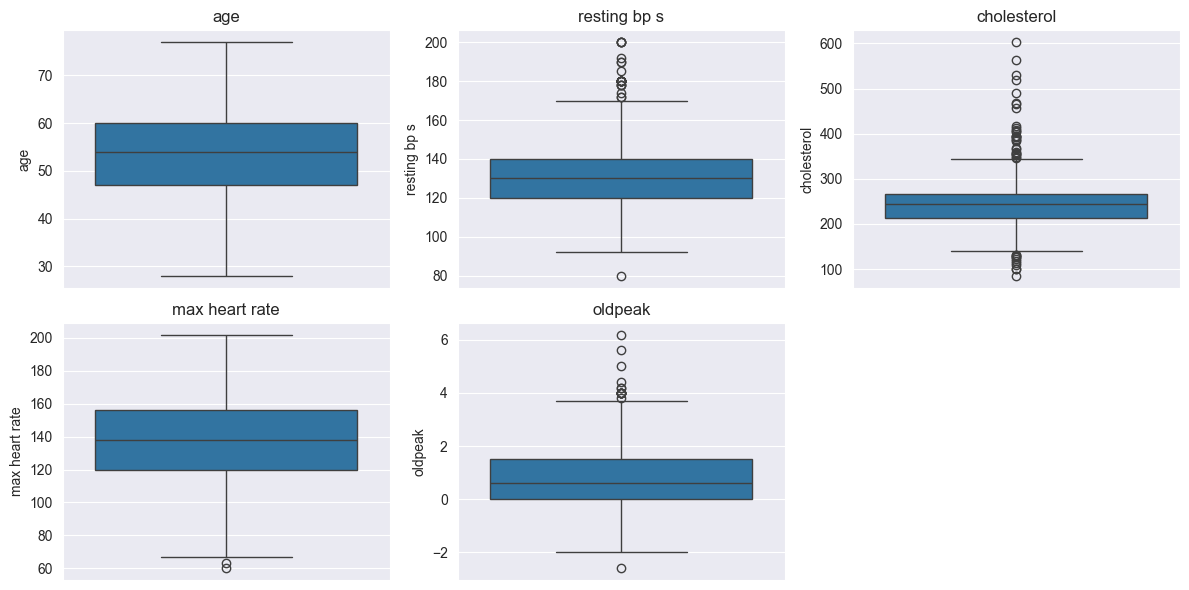

In [88]:
#Cell 9: Outliers Visualization
continuous_cols = ["age", "resting bp s", "cholesterol", "max heart rate", "oldpeak"]

plt.figure(figsize=(12,6))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_encoded[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [89]:
#Cell 10: Check Outliers
df_encoded = df_encoded.copy()
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for col in continuous_cols:
    outliers = detect_outliers_iqr(df_encoded, col)
    print(f"{col}: {len(outliers)} aykırı değer")

age: 0 aykırı değer
resting bp s: 27 aykırı değer
cholesterol: 41 aykırı değer
max heart rate: 2 aykırı değer
oldpeak: 16 aykırı değer


In [90]:
#Cell 11: Calculate Outlier Percentage
total_rows = len(df_encoded)

outlier_counts = {
    "resting bp s": 27,
    "cholesterol": 41,
    "max heart rate": 2,
    "oldpeak": 16
}

for feature, count in outlier_counts.items():
    percentage = (count / total_rows) * 100
    print(f"{feature}: %{percentage:.2f} aykırı değer")

resting bp s: %2.94 aykırı değer
cholesterol: %4.47 aykırı değer
max heart rate: %0.22 aykırı değer
oldpeak: %1.74 aykırı değer


In [91]:
#Cell 13: Drop outliers below %3
# Silinecek sütunları belirle
columns_to_remove_outliers = ["resting bp s", "max heart rate", "oldpeak"]

# Silinecek aykırı değer indekslerini belirlemek için boş bir set oluştur
outlier_indices = set()

# Belirlenen sütunlarda aykırı değerleri tespit edip indekslerini topluyoruz
for col in columns_to_remove_outliers:
    outliers = detect_outliers_iqr(df_encoded, col)
    outlier_indices.update(outliers.index)  # Set'e ekleyerek tekrarları önlüyoruz

# Aykırı değerleri içeren satırları siliyoruz
df_encoded.drop(index=outlier_indices, inplace=True)

# Güncellenmiş veri setinin boyutunu yazdırıyoruz
print(f"Yeni veri seti boyutu: {df_encoded.shape}")


Yeni veri seti boyutu: (874, 15)


In [92]:
#Cell 14: Replace outliers with median above %3
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = data[column].median()

    # Aykırı değerleri medyan ile değiştir
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = median_value

# Cholesterol değişkeni için fonksiyonu çağıralım
replace_outliers_with_median(df_encoded, "cholesterol")

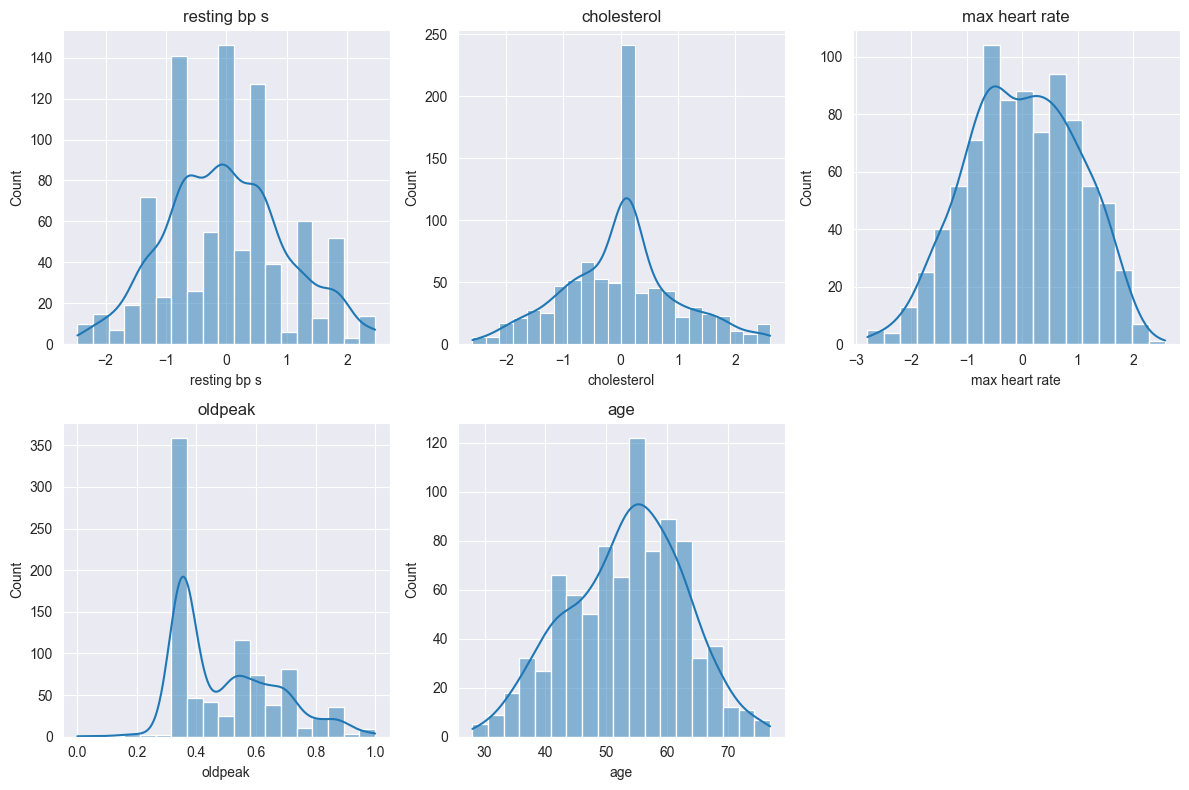

In [99]:
#Cell 15: Check Continuous Columns
continuous_cols = ["resting bp s", "cholesterol", "max heart rate", "oldpeak", "age"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_encoded[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [100]:
#Cell 16: Scale Continuous Columns
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

df_encoded[["resting bp s", "cholesterol", "max heart rate", "age"]] = standard_scaler.fit_transform(df_encoded[["resting bp s", "cholesterol", "max heart rate", "age"]])
df_encoded[["oldpeak"]] = min_max_scaler.fit_transform(df_encoded[["oldpeak"]])

In [101]:
#Cell 17:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 874 entries, 0 to 1189
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    874 non-null    float64
 1   chest pain type        874 non-null    int64  
 2   resting bp s           874 non-null    float64
 3   cholesterol            874 non-null    float64
 4   resting ecg            874 non-null    int64  
 5   max heart rate         874 non-null    float64
 6   oldpeak                874 non-null    float64
 7   ST slope               874 non-null    int64  
 8   target                 874 non-null    int64  
 9   sex_0                  874 non-null    bool   
 10  sex_1                  874 non-null    bool   
 11  fasting blood sugar_0  874 non-null    bool   
 12  fasting blood sugar_1  874 non-null    bool   
 13  exercise angina_0      874 non-null    bool   
 14  exercise angina_1      874 non-null    bool   
dtypes: bool(6)

In [102]:
#Cell 18:
df_encoded.head()

,age,chest pain type,resting bp s,cholesterol,resting ecg,max heart rate,oldpeak,ST slope,target,sex_0,sex_1,fasting blood sugar_0,fasting blood sugar_1,exercise angina_0,exercise angina_1
0,-1.404997,2,0.567638,1.250815,0,1.385339,0.350877,1,0,False,True,True,False,True,False
1,-0.457491,3,1.831948,-1.538323,0,0.749025,0.526316,2,1,True,False,True,False,True,False
2,-1.720832,2,-0.064517,1.097284,1,-1.557613,0.350877,1,0,False,True,True,False,True,False
3,-0.562770,4,0.441207,-0.668317,0,-1.159917,0.614035,2,1,True,False,True,False,False,True
4,0.068901,3,1.199793,-1.154497,0,-0.603142,0.350877,1,0,False,True,True,False,True,False


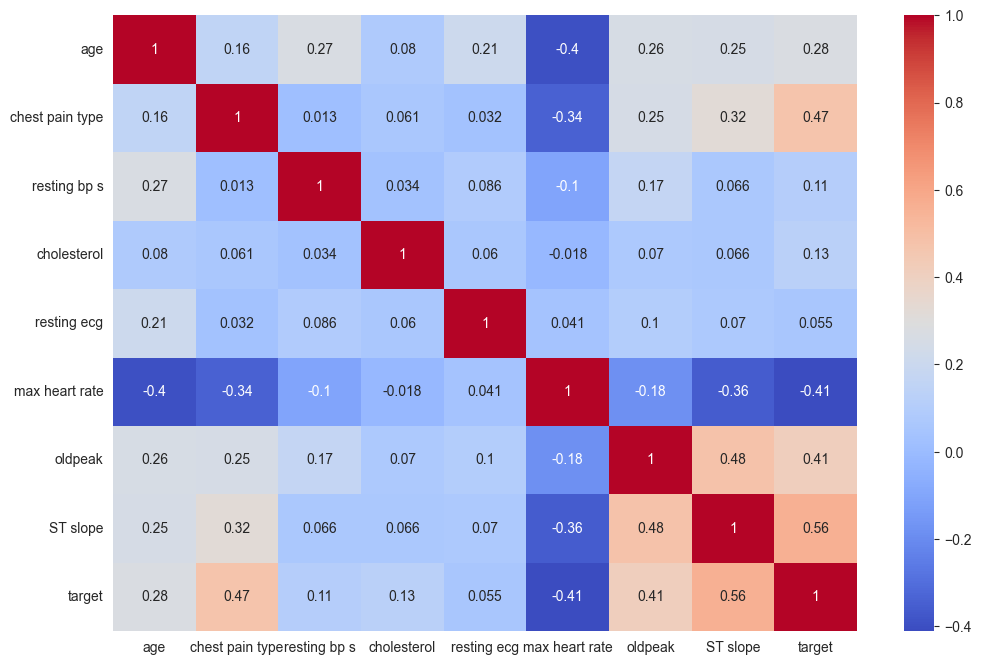

In [105]:
#Cell 19: Feature Selection with correlation
continuous_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_encoded[continuous_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [107]:
#Cell 20:
threshold = 0.8
highly_correlated = set()

# Korelasyon matrisinde her bir özellik çiftini kontrol edelim
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_with = corr_matrix.columns[j]
            correlation_value = corr_matrix.iloc[i, j]
            highly_correlated.add((colname, correlated_with, correlation_value))

# Yüksek korelasyonlu çiftleri yazdırmak
if highly_correlated:
    print("Yüksek Korelasyonlu Özellikler:")
    for col1, col2, corr_value in highly_correlated:
        print(f"{col1} ile {col2} arasındaki korelasyon: {corr_value:.2f}")
else:
    print("Yüksek korelasyonlu özellik çiftleri bulunamadı.")

Yüksek korelasyonlu özellik çiftleri bulunamadı.


In [111]:
# Cell 21: Save Cleaned Dataset
df_encoded.to_csv(cleaned_data_path, index=True)